In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from torch.nn import Softplus #smooth relu
import torch.nn as nn
import torch.nn.functional as F
from utils import generate_polynomial_data
import numpy as np
import torch
import torch.optim as optim
from torch.nn import MSELoss
from tqdm import tqdm

from model import Net, check_loss_landscape

In [6]:
suffix = "3"

n = 20
d = 10000
generate_data = True

coeffs = np.random.rand(d, 1)
xvals = np.random.rand(n)
if generate_data:
    print("Generating Data...")
    X, Y = generate_polynomial_data(coeffs, xvals)
    '''with open("./datasets/X%s.npy" %suffix, "wb") as f:
        np.save(f, X)
    with open("./datasets/Y%s.npy" %suffix, "wb") as f:
        np.save(f, Y)
    with open("./datasets/coeffs%s.npy" %suffix, "wb") as f:
        np.save(f, coeffs)'''

 35%|███▌      | 7/20 [00:00<00:00, 62.55it/s]

Generating Data...


100%|██████████| 20/20 [00:00<00:00, 58.06it/s]


In [ ]:
type(torch.from_numpy(X).to(device))

  0%|          | 17/5000 [00:00<00:30, 163.51it/s]

Running on GPU
Running on GPU


 41%|████      | 2038/5000 [00:10<00:14, 207.76it/s]

Epoch 1 iteration 2000 loss: 232.82


 80%|████████  | 4022/5000 [00:20<00:04, 200.33it/s]

Epoch 1 iteration 4000 loss: 330.76


 41%|████      | 2035/5000 [00:10<00:15, 195.30it/s]

Epoch 2 iteration 2000 loss: 97.86


 81%|████████  | 4039/5000 [00:20<00:04, 198.75it/s]

Epoch 2 iteration 4000 loss: 195.57


 41%|████      | 2036/5000 [00:10<00:14, 199.61it/s]

Epoch 3 iteration 2000 loss: 98.75


 80%|████████  | 4023/5000 [00:20<00:04, 206.27it/s]

Epoch 3 iteration 4000 loss: 196.78


 40%|████      | 2021/5000 [00:10<00:15, 196.61it/s]

Epoch 4 iteration 2000 loss: 98.03


 81%|████████  | 4038/5000 [00:20<00:04, 199.35it/s]

Epoch 4 iteration 4000 loss: 196.06


 41%|████      | 2030/5000 [00:10<00:15, 192.22it/s]

Epoch 5 iteration 2000 loss: 98.03


 81%|████████  | 4028/5000 [00:20<00:05, 192.00it/s]

Epoch 5 iteration 4000 loss: 196.06


 41%|████      | 2031/5000 [00:10<00:15, 193.53it/s]

Epoch 6 iteration 2000 loss: 98.03


 81%|████████  | 4034/5000 [00:20<00:05, 190.84it/s]

Epoch 6 iteration 4000 loss: 196.06


 41%|████      | 2028/5000 [00:10<00:15, 189.67it/s]

Epoch 7 iteration 2000 loss: 98.03


 81%|████████  | 4033/5000 [00:20<00:05, 187.70it/s]

Epoch 7 iteration 4000 loss: 196.06


 41%|████      | 2034/5000 [00:10<00:15, 189.01it/s]

Epoch 8 iteration 2000 loss: 98.03


 81%|████████  | 4027/5000 [00:20<00:04, 197.41it/s]

Epoch 8 iteration 4000 loss: 196.06


 41%|████      | 2039/5000 [00:10<00:14, 202.14it/s]

Epoch 9 iteration 2000 loss: 98.03


 81%|████████  | 4030/5000 [00:20<00:04, 194.17it/s]

Epoch 9 iteration 4000 loss: 196.06


 41%|████      | 2028/5000 [00:10<00:14, 198.36it/s]

Epoch 10 iteration 2000 loss: 98.03


 81%|████████  | 4036/5000 [00:20<00:04, 194.31it/s]

Epoch 10 iteration 4000 loss: 196.06


 40%|████      | 2020/5000 [00:10<00:15, 190.80it/s]

Epoch 11 iteration 2000 loss: 98.03


 80%|████████  | 4019/5000 [00:20<00:05, 191.52it/s]

Epoch 11 iteration 4000 loss: 196.06


 41%|████      | 2031/5000 [00:10<00:15, 196.44it/s]

Epoch 12 iteration 2000 loss: 98.03


 81%|████████  | 4027/5000 [00:20<00:04, 194.84it/s]

Epoch 12 iteration 4000 loss: 196.06


 40%|████      | 2022/5000 [00:10<00:15, 187.96it/s]

Epoch 13 iteration 2000 loss: 98.03


 81%|████████  | 4036/5000 [00:20<00:04, 198.68it/s]

Epoch 13 iteration 4000 loss: 196.06


 41%|████      | 2037/5000 [00:10<00:14, 203.46it/s]

Epoch 14 iteration 2000 loss: 98.03


 81%|████████  | 4028/5000 [00:20<00:04, 197.90it/s]

Epoch 14 iteration 4000 loss: 196.06


 41%|████      | 2029/5000 [00:10<00:14, 198.63it/s]

Epoch 15 iteration 2000 loss: 98.03


 80%|████████  | 4020/5000 [00:20<00:05, 195.14it/s]

Epoch 15 iteration 4000 loss: 196.06


 40%|████      | 2023/5000 [00:10<00:15, 197.96it/s]

Epoch 16 iteration 2000 loss: 98.03


 80%|████████  | 4021/5000 [00:20<00:04, 196.33it/s]

Epoch 16 iteration 4000 loss: 196.06


 41%|████      | 2028/5000 [00:10<00:15, 191.53it/s]

Epoch 17 iteration 2000 loss: 98.03


 81%|████████  | 4028/5000 [00:20<00:04, 200.84it/s]

Epoch 17 iteration 4000 loss: 196.06


 41%|████      | 2032/5000 [00:10<00:15, 192.63it/s]

Epoch 18 iteration 2000 loss: 98.03


 81%|████████  | 4027/5000 [00:20<00:04, 197.36it/s]

Epoch 18 iteration 4000 loss: 196.06


 41%|████      | 2029/5000 [00:10<00:15, 195.74it/s]

Epoch 19 iteration 2000 loss: 98.03


 81%|████████  | 4028/5000 [00:20<00:04, 213.80it/s]

Epoch 19 iteration 4000 loss: 196.06


 41%|████      | 2028/5000 [00:10<00:15, 191.16it/s]

Epoch 20 iteration 2000 loss: 98.03


 81%|████████  | 4038/5000 [00:20<00:04, 200.66it/s]

Epoch 20 iteration 4000 loss: 196.06


100%|██████████| 5000/5000 [00:25<00:00, 196.92it/s]


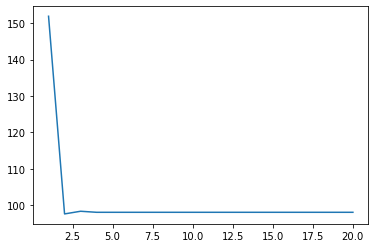

Overall loss: tensor(4.9015, grad_fn=<MseLossBackward>)


In [9]:
torch.manual_seed(0)

sgd = False
train = True

if sgd:
    model_path = "./models/model_sgd_%s.pt"%suffix
    net = Net(d, epochs = 50)
else:
    model_path = "./models/model_%s.pt"%suffix
    net = Net(d, epochs = 20)
    
if train:
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        print("Running on GPU")
    net.to(device)
    if sgd:
        net.train_sgd(X, Y, 100000, lr = 1e-2)
    else:
        net.train_gd(X, Y, 5000, lr = 1e-4)
    torch.save(net.state_dict(), model_path)

In [10]:
check_loss_landscape(model_path, X, Y, sgd=True)

Overall loss: tensor(4.9015, grad_fn=<MseLossBackward>)
1.3611263036727905 0.3162876488830964
1.3611254692077637 0.6800230701847404
1.3611263036727905 0.30164263605777514
1.3611266613006592 0.20404333340290884
1.361126184463501 0.35530194367081197
1.3611255884170532 0.631280639250649
1.3611246347427368 1.2465288990812518
1.3611253499984741 0.7949882658782934
1.3611221313476562 3.6240444505902896
1.3611235618591309 2.05548706953245
1.36112642288208 0.25766119922213715
1.3611243963241577 1.3965496370123833
1.3611266613006592 0.19281262982129516
1.3611243963241577 1.3469954527475514
1.3611189126968384 10.17736314197414
1.3611230850219727 2.560952171568289
1.3611266613006592 0.18704139630069302
1.361126184463501 0.37939132961750455
1.3611265420913696 0.22255241985837348
1.3611263036727905 0.29185108712127117


In [12]:
torch.manual_seed(0)

sgd = True
train = True

if sgd:
    model_path = "./models/model_sgd_%s.pt"%suffix
    net = Net(d, epochs = 50)
else:
    model_path = "./models/model_%s.pt"%suffix
    net = Net(d, epochs = 20)
    
if train:
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        print("Running on GPU")
    net.to(device)
    if sgd:
        net.train_sgd(X, Y, 100000, lr = 1e-2)
    else:
        net.train_gd(X, Y, 5000, lr = 1e-4)
    torch.save(net.state_dict(), model_path)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
check_loss_landscape(model_path, X, Y, sgd=True)

# old

In [ ]:
net = Net(d, epochs = 20)

In [ ]:
device = torch.device("cuda:0")
net.to(device)

In [ ]:
net.train_gd(X, Y, 5000, lr = 1e-4)

In [ ]:
device = next(net.parameters()).device

In [ ]:
X_cuda = torch.from_numpy(X).to(device)
Y_cuda = torch.from_numpy(Y).to(device)

In [ ]:
n, d = X_cuda.size()
print(n)
print(d)

In [ ]:
net.train_gd(X, Y, T=5000, lr=1e-4)

In [ ]:
suffix = "sgd_20_epochs"
torch.save(net.state_dict(), "./models/model%s.pt"%suffix)